# Titanic Dataset - 数据可视化与探索

这个notebook主要进行以下分析：
1. 生存率总体分布
2. 各个特征与生存率的关系分析
3. 特征之间的相关性分析
4. 数据分布可视化

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')
%matplotlib inline

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

C:\Users\Administrator\AppData\Local\Temp\ipykernel_41296\2642530958.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# 加载数据
train_data = pd.read_csv('data/train.csv')
print("数据集形状:", train_data.shape)

数据集形状: (891, 12)


## 1. 生存率总体分布

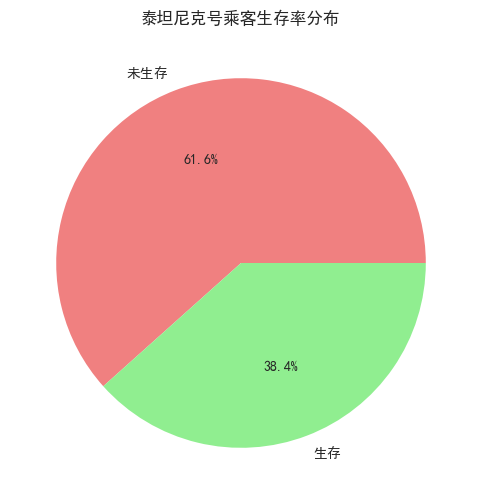

总体生存率: 38.4%


In [3]:
# 计算总体生存率
survival_rate = train_data['Survived'].mean() * 100

# 绘制生存率分布饼图
plt.figure(figsize=(8, 6))
plt.pie(train_data['Survived'].value_counts(),
        labels=['未生存', '生存'],
        autopct='%1.1f%%',
        colors=['lightcoral', 'lightgreen'])
plt.title('泰坦尼克号乘客生存率分布')
plt.show()

print(f"总体生存率: {survival_rate:.1f}%")

## 2. 各特征与生存率的关系分析

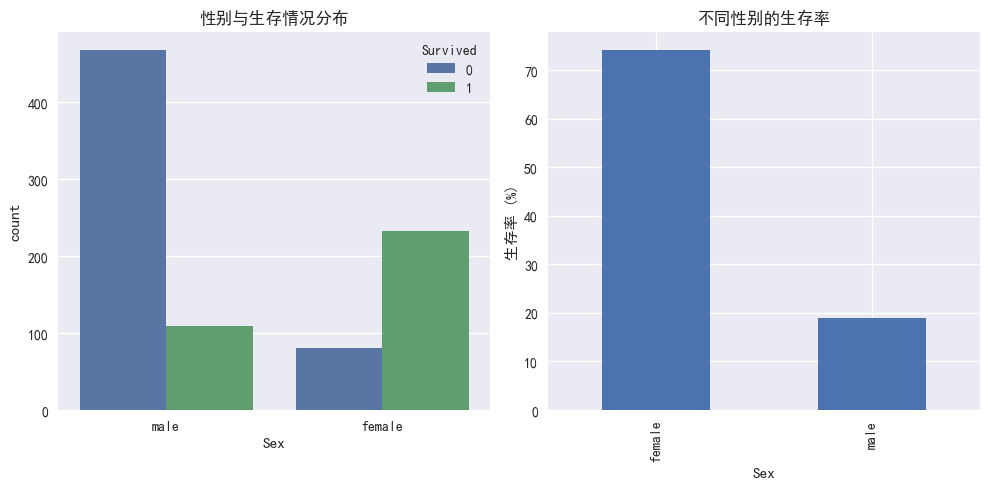

In [4]:
# 性别与生存率的关系
plt.figure(figsize=(10, 5))

# 左图：性别生存人数分布
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('性别与生存情况分布')

# 右图：性别生存率
plt.subplot(1, 2, 2)
survival_rate_by_sex = train_data.groupby('Sex')['Survived'].mean() * 100
survival_rate_by_sex.plot(kind='bar')
plt.title('不同性别的生存率')
plt.ylabel('生存率 (%)')

plt.tight_layout()
plt.show()

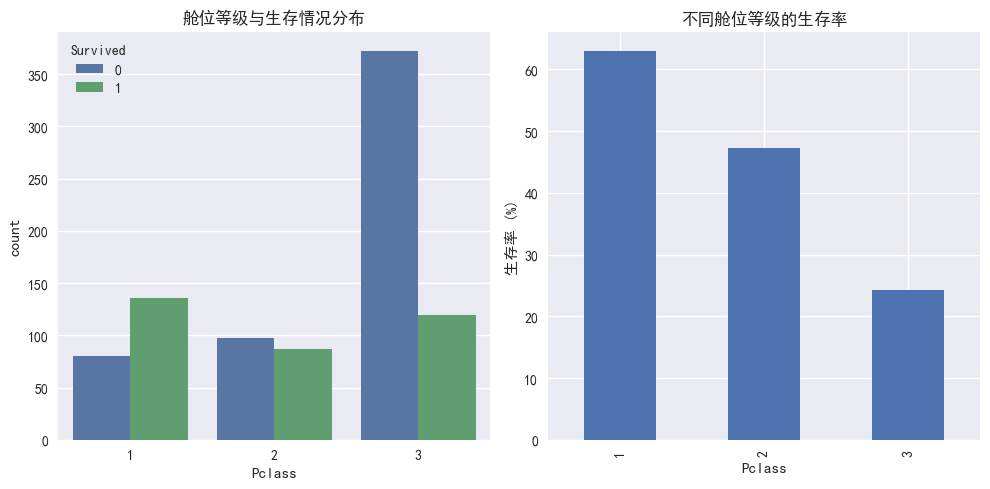

In [5]:
# 客舱等级与生存率的关系
plt.figure(figsize=(10, 5))

# 左图：舱位等级生存人数分布
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('舱位等级与生存情况分布')

# 右图：舱位等级生存率
plt.subplot(1, 2, 2)
survival_rate_by_class = train_data.groupby('Pclass')['Survived'].mean() * 100
survival_rate_by_class.plot(kind='bar')
plt.title('不同舱位等级的生存率')
plt.ylabel('生存率 (%)')

plt.tight_layout()
plt.show()

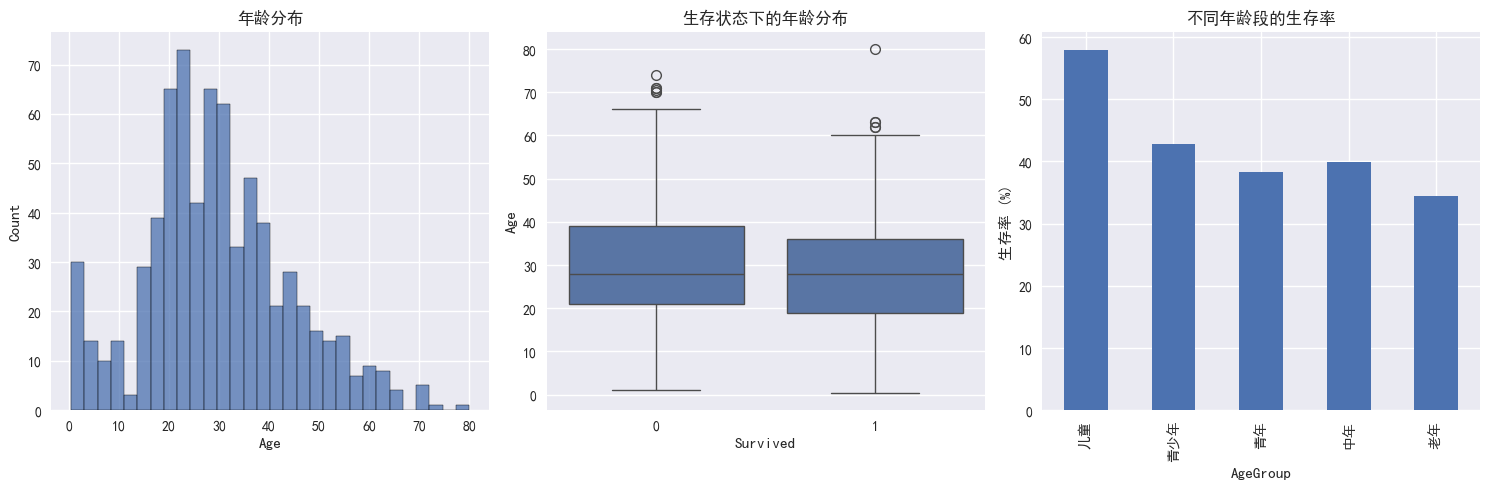

In [6]:
# 年龄分布与生存率的关系
plt.figure(figsize=(15, 5))

# 左图：年龄分布
plt.subplot(1, 3, 1)
sns.histplot(data=train_data, x='Age', bins=30)
plt.title('年龄分布')

# 中图：年龄与生存率的关系
plt.subplot(1, 3, 2)
sns.boxplot(data=train_data, x='Survived', y='Age')
plt.title('生存状态下的年龄分布')

# 右图：年龄段与生存率
plt.subplot(1, 3, 3)
train_data['AgeGroup'] = pd.cut(train_data['Age'], 
                               bins=[0, 12, 18, 35, 50, 100],
                               labels=['儿童', '青少年', '青年', '中年', '老年'])
survival_rate_by_age = train_data.groupby('AgeGroup')['Survived'].mean() * 100
survival_rate_by_age.plot(kind='bar')
plt.title('不同年龄段的生存率')
plt.ylabel('生存率 (%)')

plt.tight_layout()
plt.show()

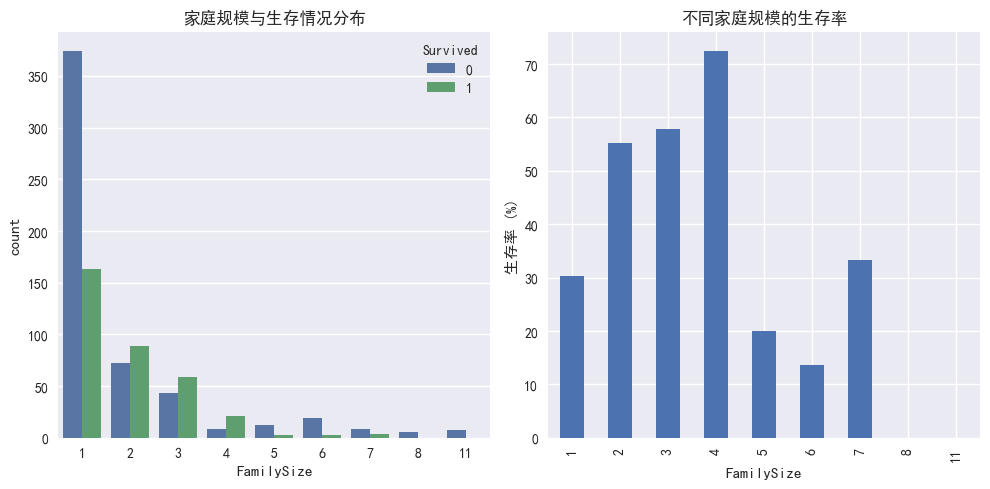

In [7]:
# 分析家庭规模与生存率的关系
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

plt.figure(figsize=(10, 5))

# 左图：家庭规模分布
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='FamilySize', hue='Survived')
plt.title('家庭规模与生存情况分布')

# 右图：家庭规模与生存率
plt.subplot(1, 2, 2)
survival_rate_by_family = train_data.groupby('FamilySize')['Survived'].mean() * 100
survival_rate_by_family.plot(kind='bar')
plt.title('不同家庭规模的生存率')
plt.ylabel('生存率 (%)')

plt.tight_layout()
plt.show()

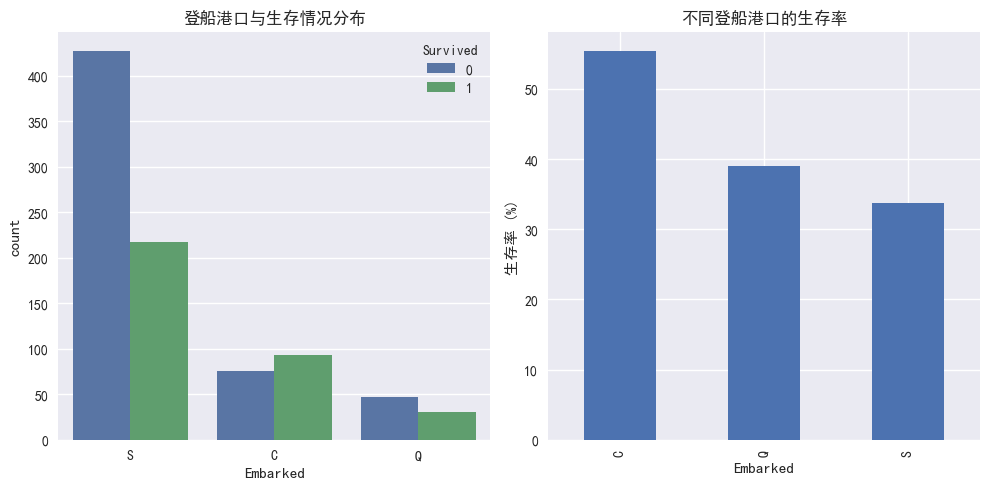

In [8]:
# 登船港口与生存率的关系
plt.figure(figsize=(10, 5))

# 左图：登船港口分布
plt.subplot(1, 2, 1)
sns.countplot(data=train_data, x='Embarked', hue='Survived')
plt.title('登船港口与生存情况分布')

# 右图：登船港口与生存率
plt.subplot(1, 2, 2)
survival_rate_by_port = train_data.groupby('Embarked')['Survived'].mean() * 100
survival_rate_by_port.plot(kind='bar')
plt.title('不同登船港口的生存率')
plt.ylabel('生存率 (%)')

plt.tight_layout()
plt.show()

## 3. 特征相关性分析

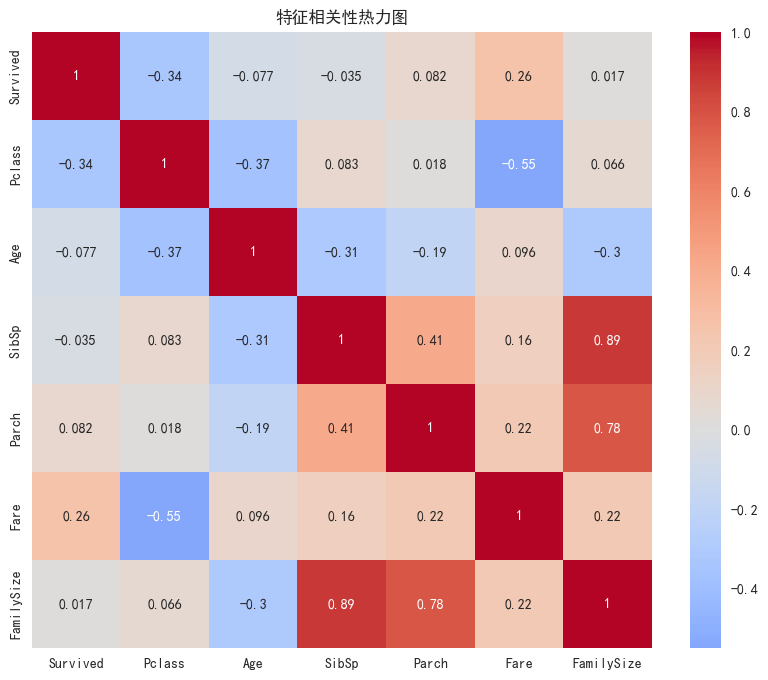

In [9]:
# 计算数值特征之间的相关性
numeric_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
correlation_matrix = train_data[numeric_features].corr()

# 绘制相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('特征相关性热力图')
plt.show()

## 4. 主要发现总结

通过以上分析，我们可以得出以下主要发现：

1. 总体生存率：约38%的乘客在事故中存活。

2. 性别因素：
   - 女性的生存率显著高于男性
   - 这可能是因为"女士优先"的救生原则

3. 客舱等级：
   - 头等舱乘客的生存率最高
   - 舱位等级与生存率呈现明显的正相关关系

4. 年龄特征：
   - 儿童的生存率相对较高
   - 中年人的生存率较低

5. 家庭规模：
   - 中等规模家庭（2-4人）的生存率较高
   - 独行旅客和大家庭的生存率较低

6. 登船港口：
   - 不同港口的乘客生存率有一定差异
   - 这可能与乘客的社会经济地位有关

这些发现对后续的特征工程和模型构建有重要的指导意义。